In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split

---
#Multi-class Logistic Regression Demo
---

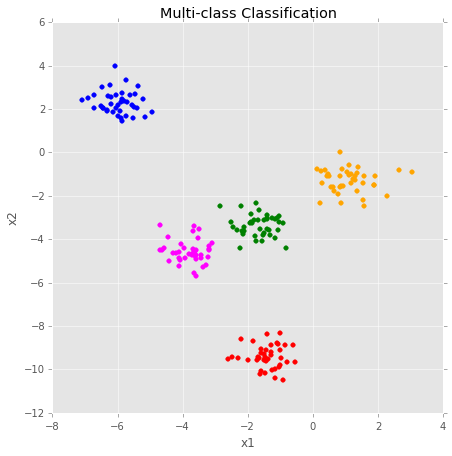

In [2]:
#Use the blob functionality again, but this time make 5 separate blobs

m = 200

#Maintain this as a 2 dimensional exercise
N = 2
num_blobs = 5

#Set the standard deviation small so the blobs completely separate
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=0.5, random_state=2)

#Plot
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)

ax.scatter(X[y == 0,0], X[y == 0,1], color='red')
ax.scatter(X[y == 1,0], X[y == 1,1], color='orange')
ax.scatter(X[y == 2,0], X[y == 2,1], color='green')
ax.scatter(X[y == 3,0], X[y == 3,1], color='blue')
ax.scatter(X[y == 4,0], X[y == 4,1], color='magenta')

ax.set_title("Multi-class Classification")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

In [3]:
#Fit a standard logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

#Let's look at the confusion matrix
cm = pd.crosstab(y, clf.predict(X), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1,2,3,4
Actual,,,,,
0,40,0,0,0,0
1,0,40,0,0,0
2,0,0,40,0,0
3,0,0,0,40,0
4,0,0,0,0,40


In [4]:
#Take 2 points - [-2, 10], and [-4, -4] and predict the probability of membership to each of the classes
#Print out the class prediction

print clf.predict([[-2.0, -10.0]])
for i in xrange(num_blobs):
    print "Probability of class {:d} = {:5.2f}".format(i, clf.predict_proba([[-2.0, -10.0]]).ravel()[i])
print clf.predict([[-4.0, -4.0]])
for i in xrange(num_blobs):
    print "Probability of class {:d} = {:5.2f}".format(i, clf.predict_proba([[-4.0, -4.0]]).ravel()[i])

[0]
Probability of class 0 =  0.61
Probability of class 1 =  0.00
Probability of class 2 =  0.11
Probability of class 3 =  0.00
Probability of class 4 =  0.28
[4]
Probability of class 0 =  0.03
Probability of class 1 =  0.00
Probability of class 2 =  0.29
Probability of class 3 =  0.01
Probability of class 4 =  0.67


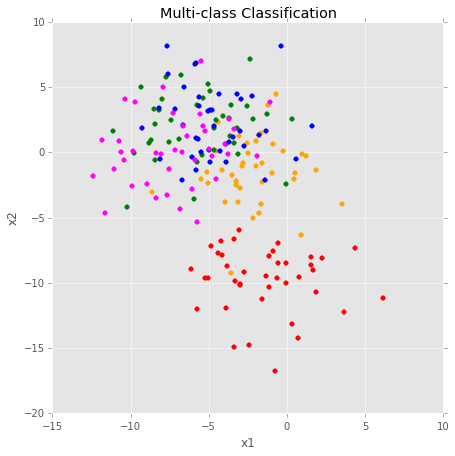

In [32]:
#Use the blob functionality again, but this time make 5 separate blobs

m = 200

#Make this 3 dimensional
N = 3
num_blobs = 5

#Set the standard deviation higher so the blobs intermix
XX, yy = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=2.5, random_state=2)

#Plot looking at dimensions 1 and 2
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)

ax.scatter(XX[yy == 0,0], XX[yy == 0,1], color='red')
ax.scatter(XX[yy == 1,0], XX[yy == 1,1], color='orange')
ax.scatter(XX[yy == 2,0], XX[yy == 2,1], color='green')
ax.scatter(XX[yy == 3,0], XX[yy == 3,1], color='blue')
ax.scatter(XX[yy == 4,0], XX[yy == 4,1], color='magenta')

ax.set_title("Multi-class Classification")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

In [55]:
#Fit a standard logistic regression model

clfs = LogisticRegression(C=10.0)
clfs.fit(XX, yy)
clfs.score(XX, yy)
cm = pd.crosstab(yy, clfs.predict(XX), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1,2,3,4
Actual,,,,,
0,39,0,0,0,1
1,3,26,3,5,3
2,0,8,10,11,11
3,0,3,4,33,0
4,0,2,2,1,35


In [52]:
#Fit a polynomial using make_pipeline. What's the best fit up to degree 8 polynomial?
clfMCLR = make_pipeline(PolynomialFeatures(6), LogisticRegression(C = 10.0))
clfMCLR.fit(XX, yy)

#print the score
print clfMCLR.score(XX, yy)

#Let's look at the confusion matrix
cm = pd.crosstab(yy, clfMCLR.predict(XX), rownames=["Actual"], colnames=["Predicted"])
cm

0.87


Predicted,0,1,2,3,4
Actual,,,,,
0,40,0,0,0,0
1,1,35,1,2,1
2,0,1,28,4,7
3,0,2,4,34,0
4,0,1,2,0,37


---
##The One-vs-Rest Strategy
---

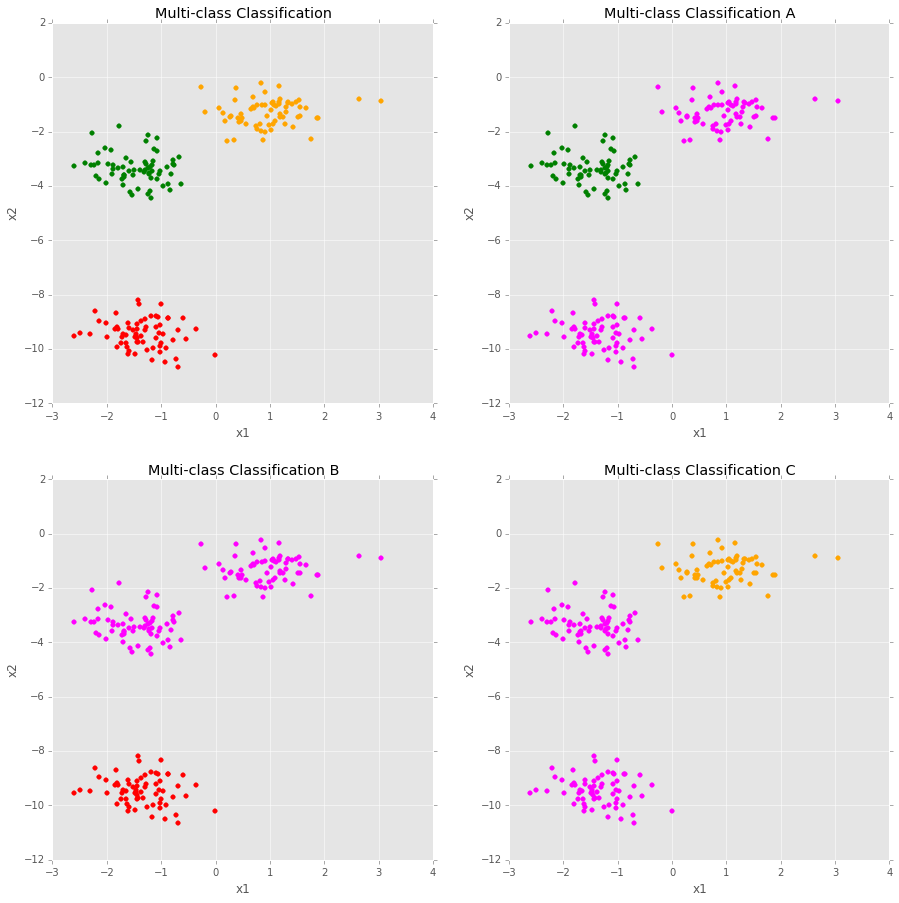

In [6]:
#Use 3 blobs to produce plots to show the 1-vs-Rest strategy
m = 200
N = 2
num_blobs = 3

X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=0.5, random_state=2)

fig = plt.figure(figsize = (15, 15))
ax = plt.subplot(221)
ax.scatter(X[y == 0,0], X[y == 0,1], color='red')
ax.scatter(X[y == 1,0], X[y == 1,1], color='orange')
ax.scatter(X[y == 2,0], X[y == 2,1], color='green')

ax.set_title("Multi-class Classification")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax = plt.subplot(222)
ax.scatter(X[y == 0,0], X[y == 0,1], color='magenta')
ax.scatter(X[y == 1,0], X[y == 1,1], color='magenta')
ax.scatter(X[y == 2,0], X[y == 2,1], color='green')

ax.set_title("Multi-class Classification A")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax = plt.subplot(223)
ax.scatter(X[y == 0,0], X[y == 0,1], color='red')
ax.scatter(X[y == 1,0], X[y == 1,1], color='magenta')
ax.scatter(X[y == 2,0], X[y == 2,1], color='magenta')


ax.set_title("Multi-class Classification B")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax = plt.subplot(224)
ax.scatter(X[y == 0,0], X[y == 0,1], color='magenta')
ax.scatter(X[y == 1,0], X[y == 1,1], color='orange')
ax.scatter(X[y == 2,0], X[y == 2,1], color='magenta')

ax.set_title("Multi-class Classification C")
ax.set_xlabel("x1")
ax.set_ylabel("x2")